<a href="https://colab.research.google.com/github/NNoorFatima/Machine-Learning/blob/main/ML_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [13]:
cols=["fLength","fWidth","fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]
df=pd.read_csv("magic04.data", names=cols) #reads the csv and turns into a pandas data frame object
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [14]:
# provides the types of options/data in the class columns
#df["class"].unique()
#converts to int like 1 for g and 0 for h
df["class"]= (df["class"]=="g").astype(int)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

In [15]:
#the attributes are called features
#each row is a sample
#to train data for supervised learning


# Machine Learning

subdomain of computer science which

*   focuses on algorithms which help a computer learn from data without explicit programming
*  subset of AI
*  tries to solve one specific problem and make predictios using data

## Types of machine learning


*   Supervised Learning:
  uses labelled inputs and outputs used to train model
*  Unsupervised Learning:
  uses unlabelled data to learn about patterns in the data
*   Reinforcement Learning:
  uses interactive environment based on rewards and penalties



# Supervised learning

* Inputs (feature factors)
  * qualitative ie categorical data (finite number of groups or types such as gender -- male and female)
    * such data is called **nominal data** as not entered in any order
    * **ordinal data**: they have some ordering system
  * quantitative: numerical valued data (could be discrete or continuous)
  

* Outputs (received from the model)
  * classification
    * binary classification- two types
    * multiclass classification- many options
  * regression : predict continuous values

* Model
   * Data is broken into
    * Training dataset: this is fed as input, allowing the model to train on it; feedback ie Loss is used to make changes to the model to ensure a closer result
    * Validation set: to ensure model can handle unseen data
    * Test set: final test used to see how generizable the final choosen model is

**Loss = sum(|y_real- y_predicted|)**linear

**Loss = sum((y_real- y_predicted)^2)** parabollic


  





In [16]:
df.head()
#now class is numerical easier for computer to understand

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

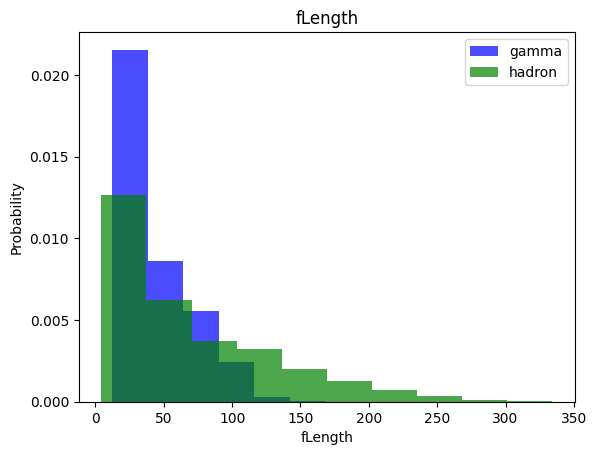

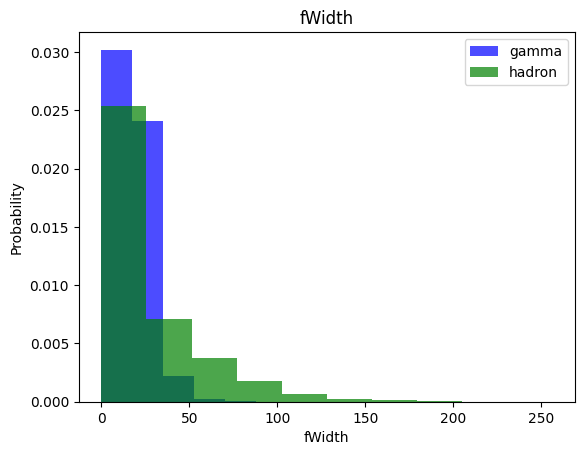

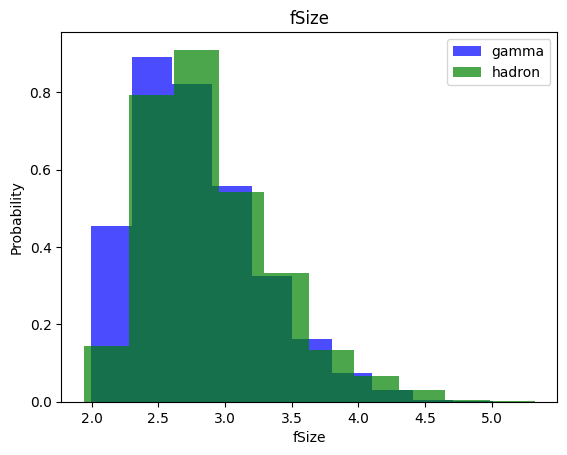

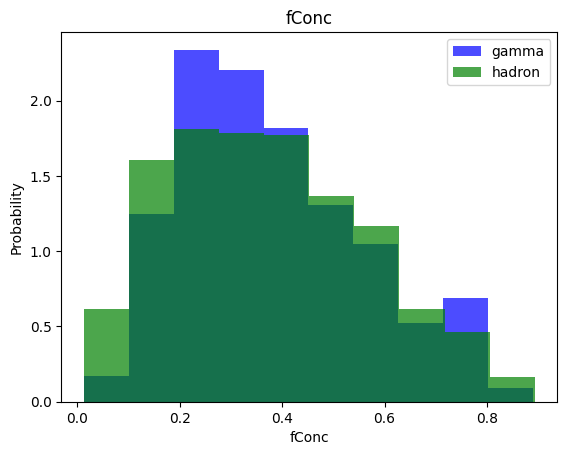

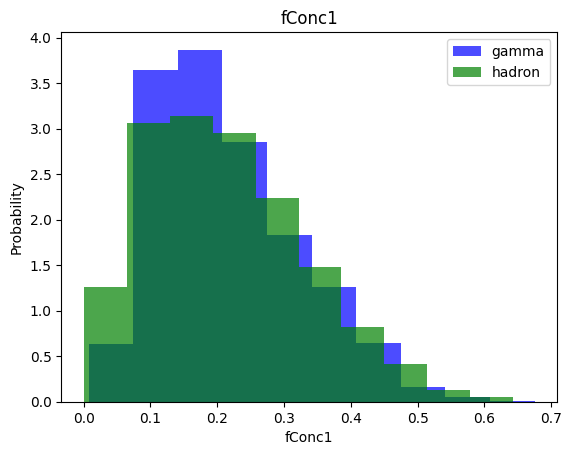

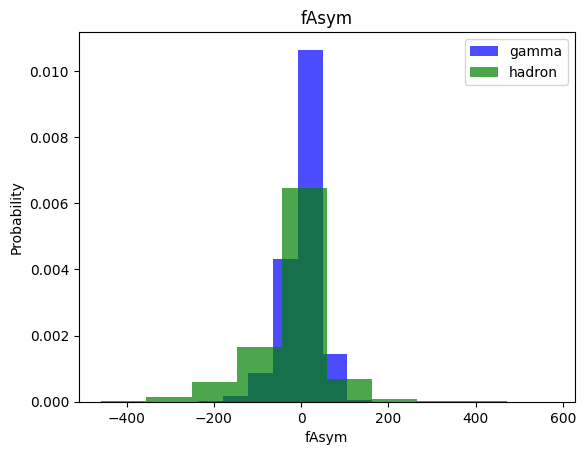

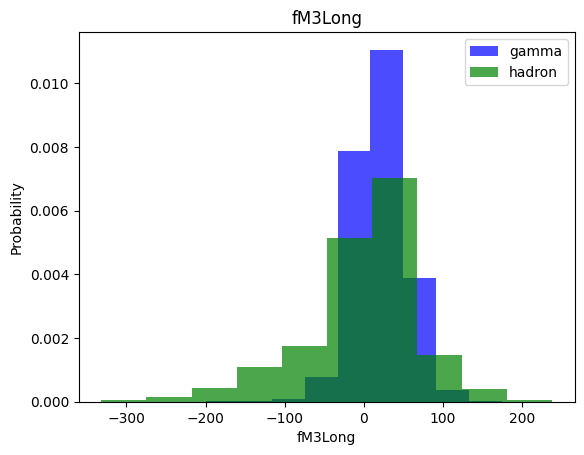

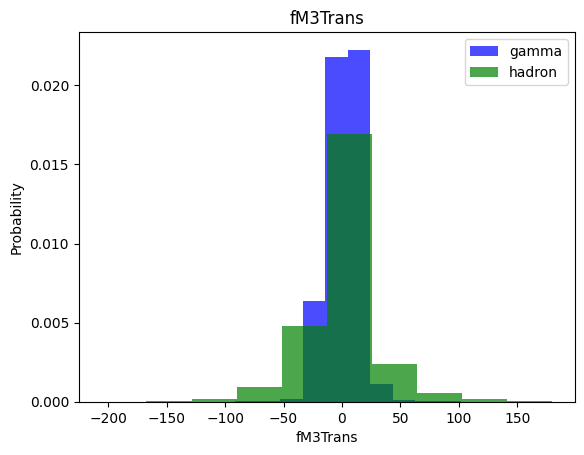

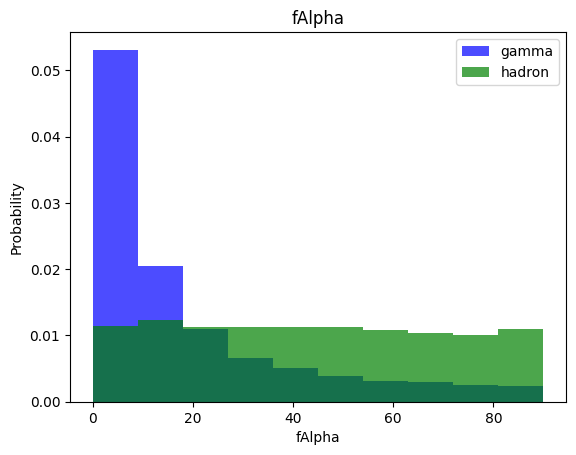

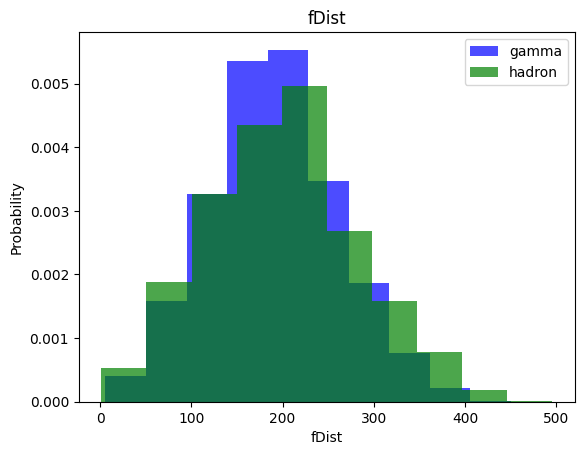

In [17]:
for label in cols[:-1]:
    plt.hist(df[df["class"]==1][label], color="blue", label="gamma", alpha=0.7, density=True)
    plt.hist(df[df["class"]==0][label], color="green", label="hadron", alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

# Train, validation and Test data set

In [18]:
train, valid, test= np.split(df.sample(frac=1),[int(0.6*len(df)), int(0.8*len(df)) ])

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [19]:
def scale_dataset(dataframe, oversample=False):
    X= dataframe[dataframe.columns[:-1]].values
    y= dataframe[dataframe.columns[-1]].values

    scaler=StandardScaler()
    X= scaler.fit_transform(X)

    #allows us to increase the data of the class/type with less data
    if oversample:
        ros= RandomOverSampler()
        X, y = ros.fit_resample(X,y)

    data = np.hstack((X,np.reshape(y,(-1,1))))
    return data, X, y

In [20]:
train, X_train, y_train= scale_dataset(train, oversample=True)
valid, X_valid, y_valid= scale_dataset(valid, oversample=False)
test, X_test, y_test= scale_dataset(test, oversample=False)

In [21]:
len(y_train)

14700

In [22]:
sum(y_train == 1)

7350

In [23]:
sum(y_train == 0)

7350

## K- nearest neighbors

uses Euclidean rule
> Add blockquote


*italicized text*

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [25]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [26]:
y_pred= knn_model.predict(X_test)

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.75      0.74      1296
           1       0.87      0.85      0.86      2508

    accuracy                           0.82      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



## *Naive Bayes*

uses bayes theorem of probability i.e. probability of event A given event B:

```
 P(A|B) = (P(B|A)*P(A)) / P(B) == P(A n B) / P(B)
```
posterior [A]

likehood [B]

 P(C_k|x) [here C_k is the class and x is the feature vector]

P(C_k|x) [A] = P(x|C_k) [B]* P(C_k) / P(x)  




In [28]:
from sklearn.naive_bayes import GaussianNB

In [29]:
nb_model = GaussianNB()
nb_model= nb_model.fit(X_train, y_train)

In [31]:
y_pred= nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.40      0.49      1296
           1       0.74      0.88      0.80      2508

    accuracy                           0.72      3804
   macro avg       0.69      0.64      0.65      3804
weighted avg       0.70      0.72      0.70      3804



## Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression

In [41]:
lg_model= LogisticRegression()
lg_model= lg_model.fit(X_train, y_train)

In [42]:
y_pred= lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.74      0.70      1296
           1       0.86      0.81      0.83      2508

    accuracy                           0.79      3804
   macro avg       0.76      0.78      0.77      3804
weighted avg       0.79      0.79      0.79      3804



## Support Vector Machine(SVM)
find a line that best divides the data i.e the hyperplane
our goal is to maximise the margins as well. Not the best model if there are outliers in the dataset.

kernel trick

In [43]:
from sklearn.svm import SVC


In [44]:
svm_model= SVC()
svm_model = svm_model.fit(X_train,y_train)

In [45]:
y_pred= svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80      1296
           1       0.90      0.88      0.89      2508

    accuracy                           0.86      3804
   macro avg       0.84      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



## Neural Network
features are inputted; these are then weighted to some value and then the sum of all these becomes input to a neuron {a bias term could be added to this neuron} then output of all of this goes into an activation function; after this activation function is applied then we receive the final output


**Without the activation fucntion**

it is a linear combination (added at each layer)

**With activation function**

added so that the model doesnt collaspe to a linear model;

## TensorFlow

allows us to deveop and train models

In [46]:
import tensorflow as tf

In [63]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Binary crossentropy')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_accuracy(history):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()


In [64]:
def train_model(X_train, y_train, num_node, drop_prob, lr, btch_sze, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_node, activation='relu', input_shape=(10,)),
      tf.keras.layers.Dropout(drop_prob),
      tf.keras.layers.Dense(num_node, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer= tf.keras.optimizers.Adam(lr), loss= 'binary_crossentropy',metrics=['accuracy'])
  history = nn_model.fit(
    X_train, y_train, epochs=epochs, batch_size=btch_sze, validation_split=0.2,verbose=0)

  return nn_model, history

nodes:  16 drop_prob: 0 lr: 0.01 batch_size: 32


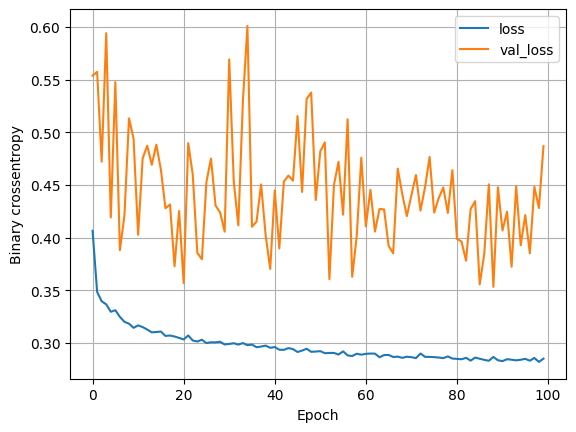

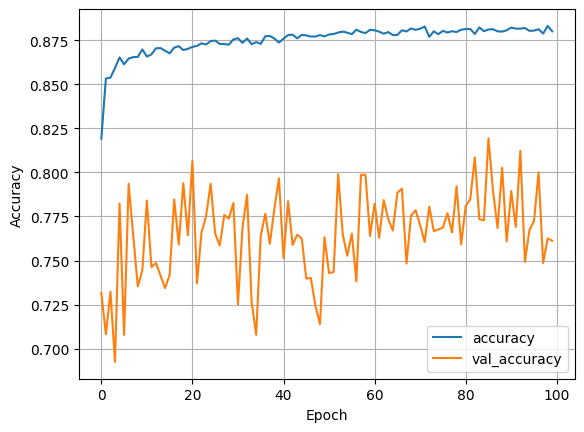

nodes:  16 drop_prob: 0 lr: 0.01 batch_size: 64


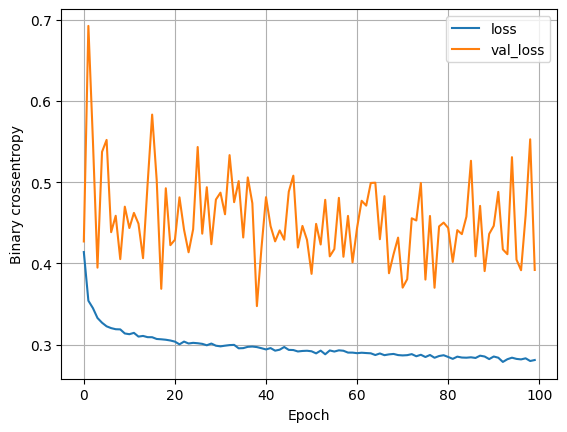

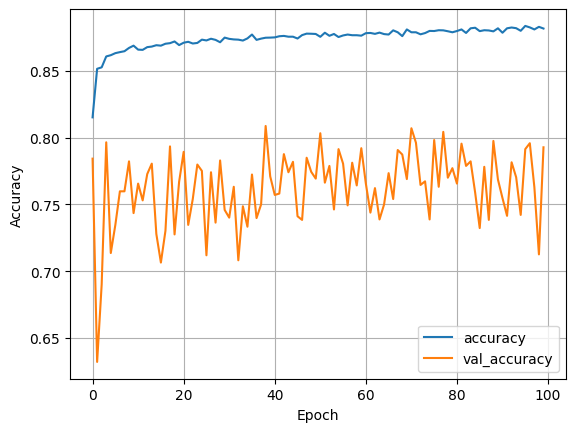

nodes:  16 drop_prob: 0 lr: 0.01 batch_size: 128


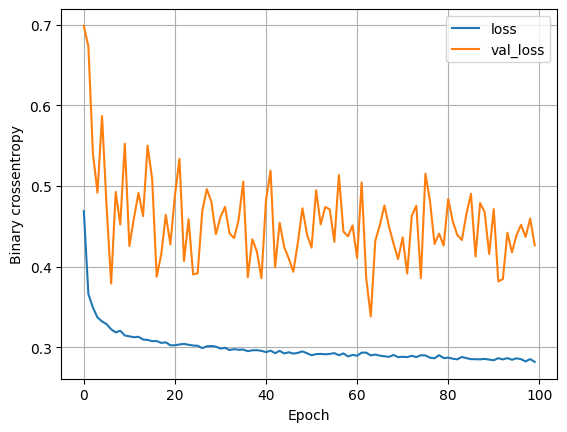

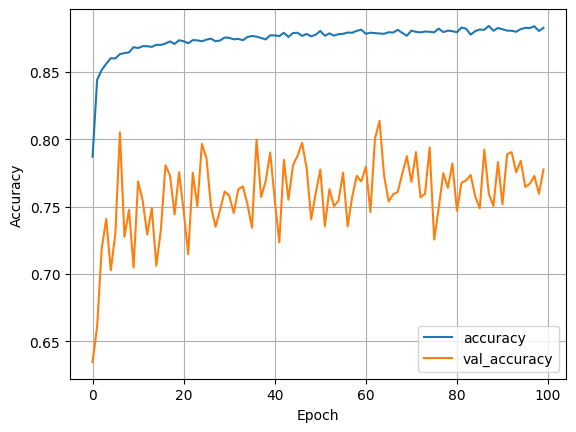

nodes:  16 drop_prob: 0 lr: 0.005 batch_size: 32


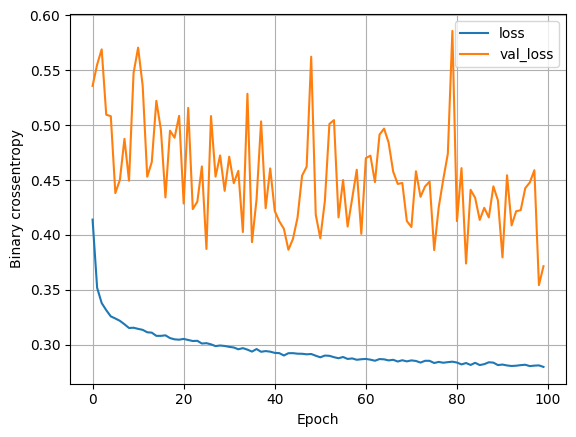

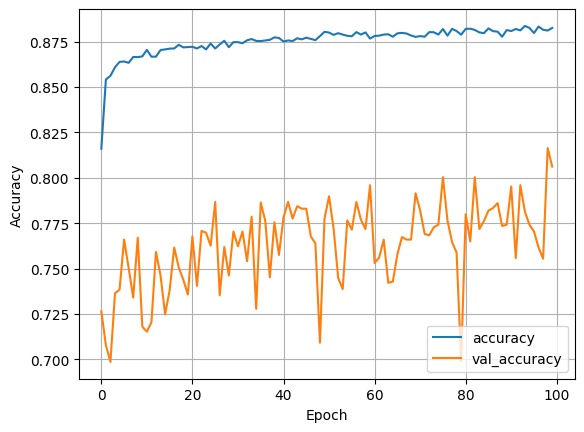

nodes:  16 drop_prob: 0 lr: 0.005 batch_size: 64


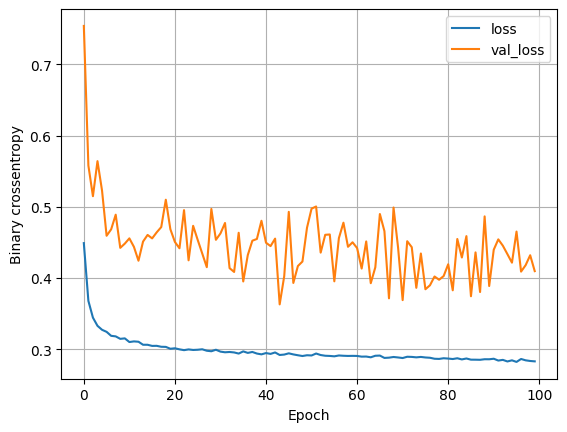

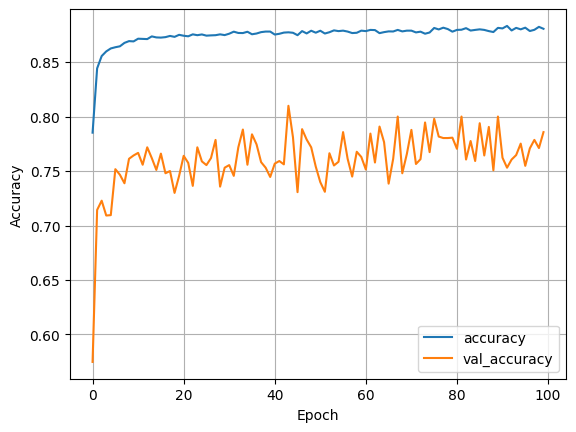

nodes:  16 drop_prob: 0 lr: 0.005 batch_size: 128


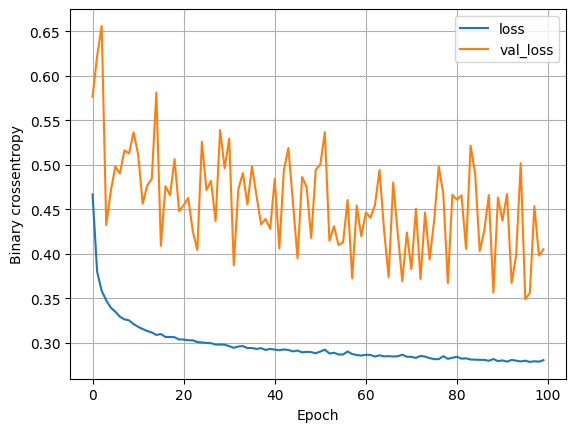

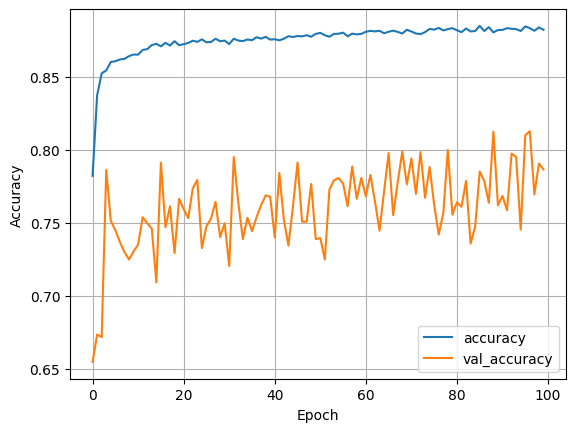

nodes:  16 drop_prob: 0 lr: 0.001 batch_size: 32


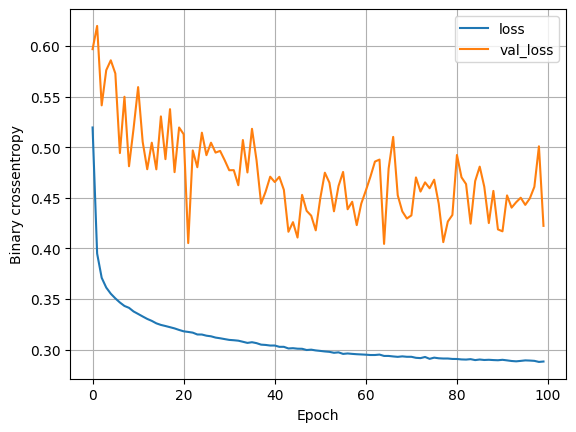

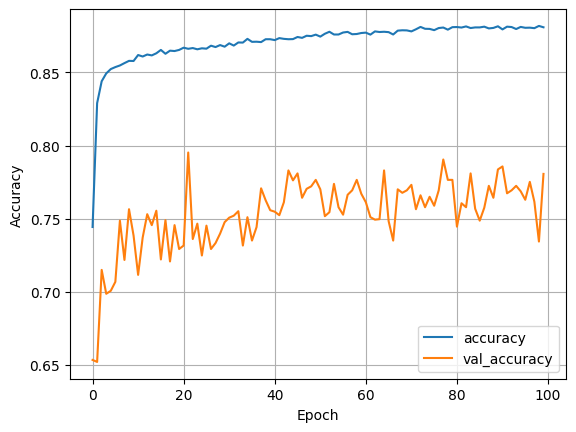

nodes:  16 drop_prob: 0 lr: 0.001 batch_size: 64


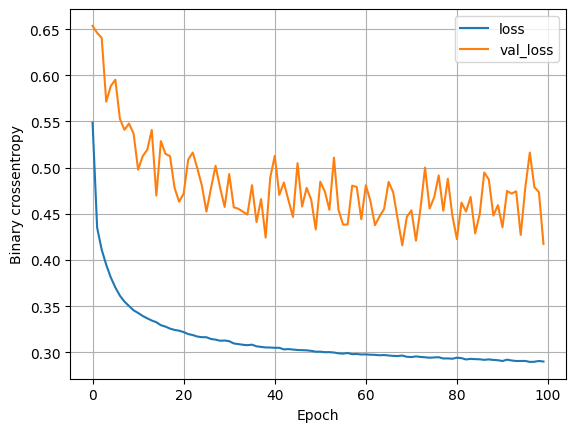

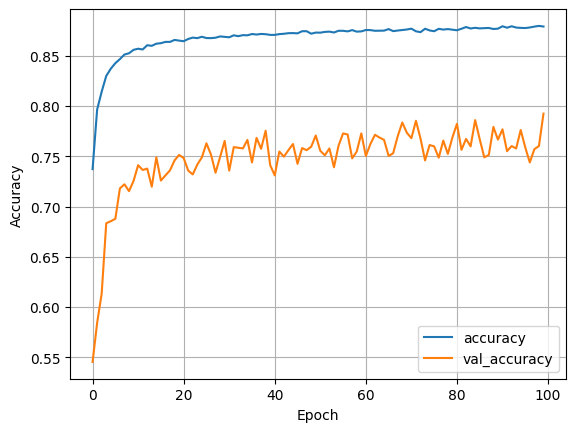

nodes:  16 drop_prob: 0 lr: 0.001 batch_size: 128


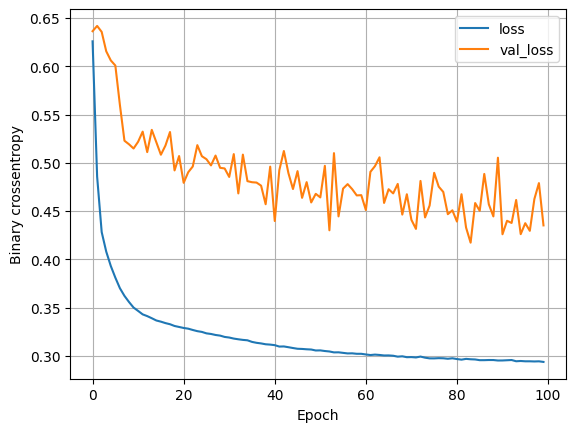

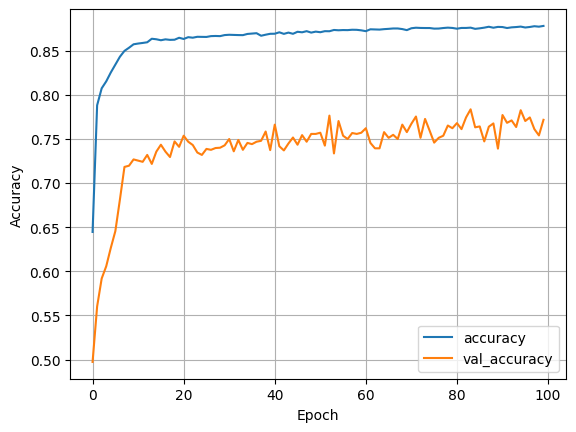

nodes:  16 drop_prob: 0.2 lr: 0.01 batch_size: 32


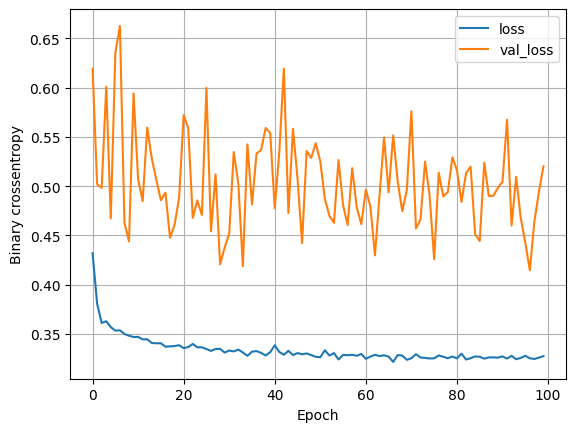

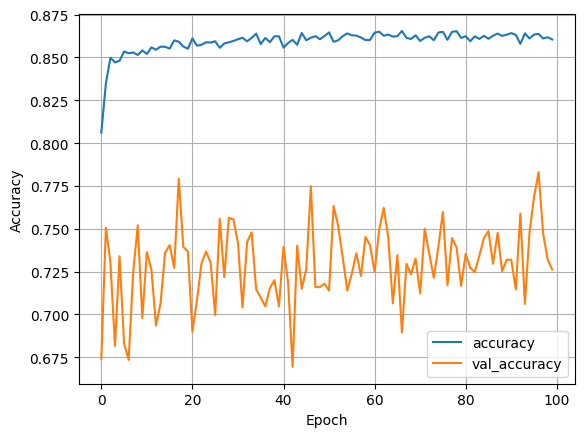

nodes:  16 drop_prob: 0.2 lr: 0.01 batch_size: 64


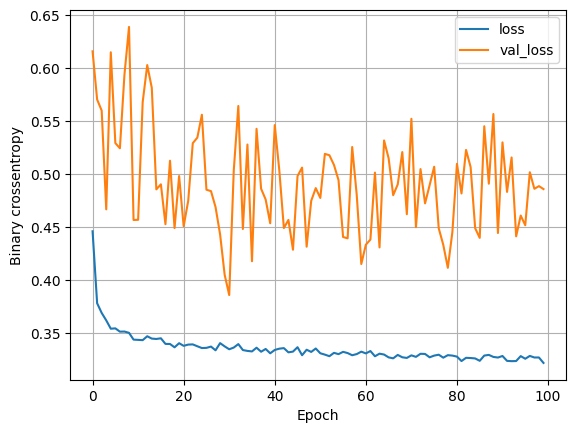

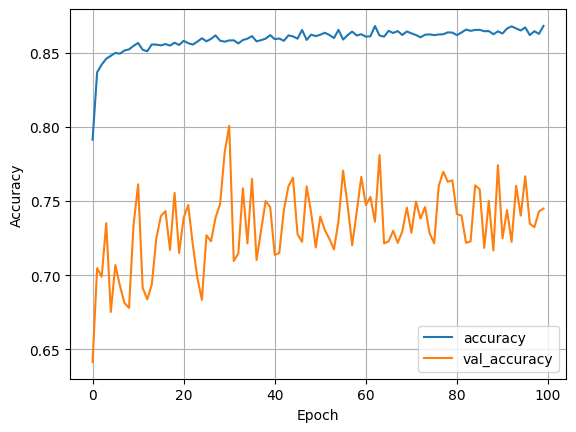

nodes:  16 drop_prob: 0.2 lr: 0.01 batch_size: 128


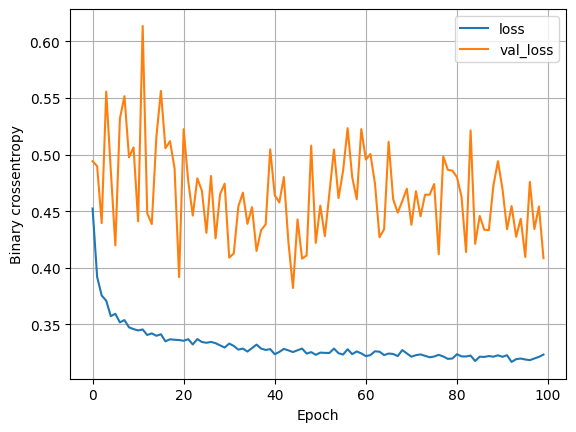

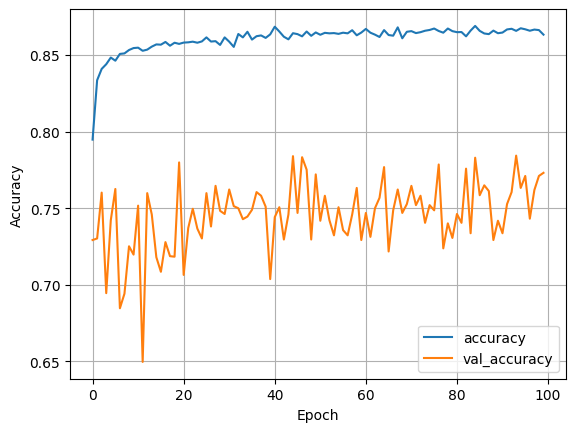

nodes:  16 drop_prob: 0.2 lr: 0.005 batch_size: 32


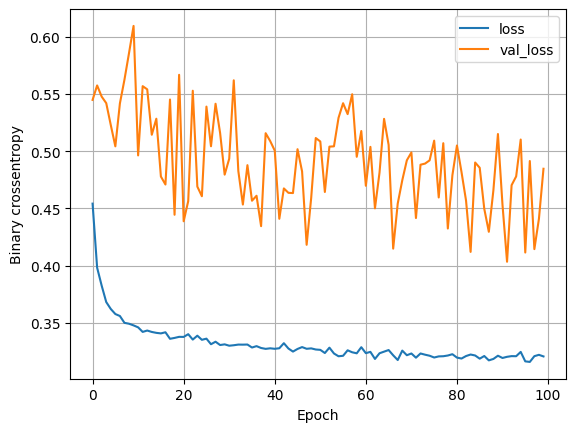

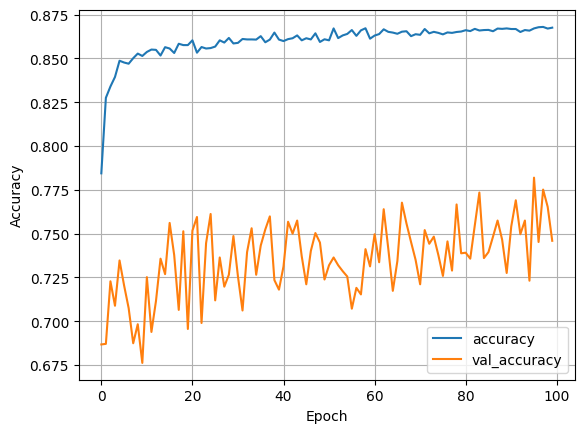

nodes:  16 drop_prob: 0.2 lr: 0.005 batch_size: 64


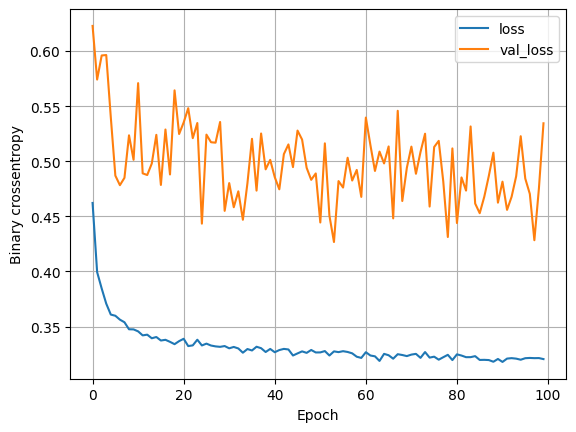

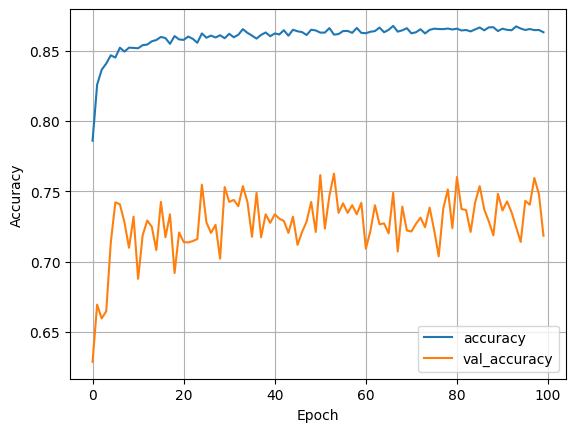

nodes:  16 drop_prob: 0.2 lr: 0.005 batch_size: 128


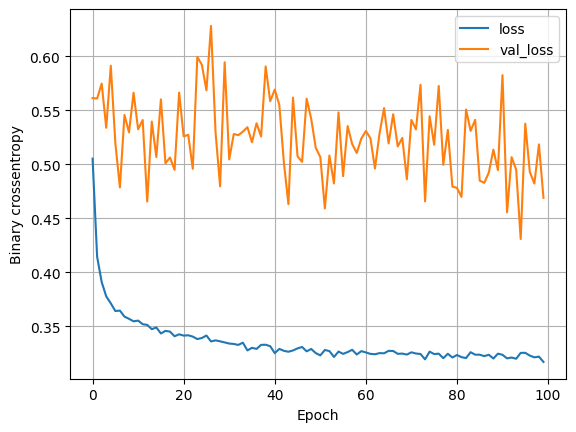

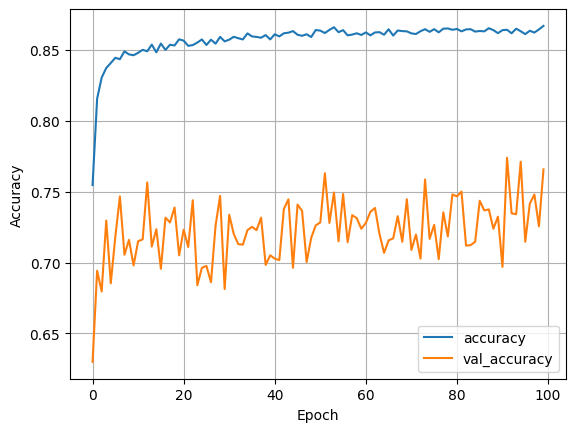

nodes:  16 drop_prob: 0.2 lr: 0.001 batch_size: 32


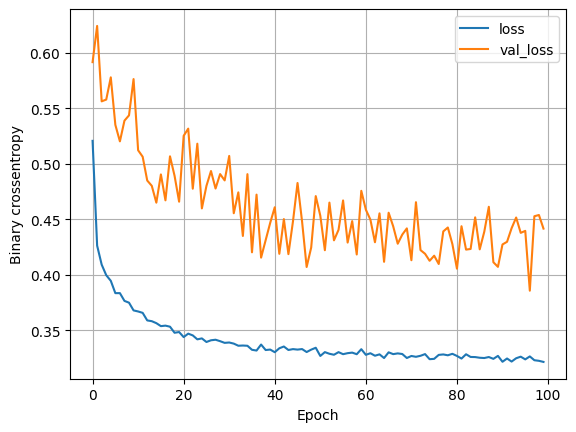

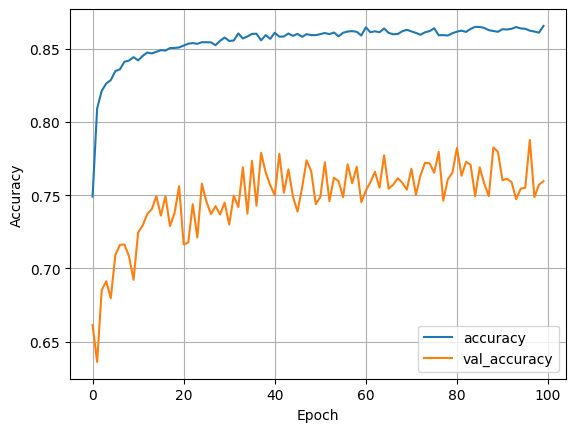

nodes:  16 drop_prob: 0.2 lr: 0.001 batch_size: 64


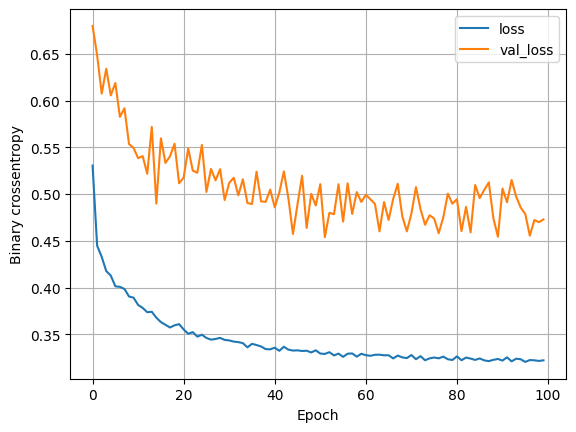

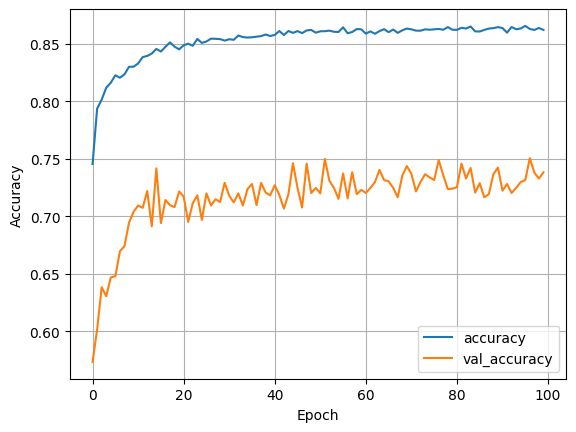

nodes:  16 drop_prob: 0.2 lr: 0.001 batch_size: 128


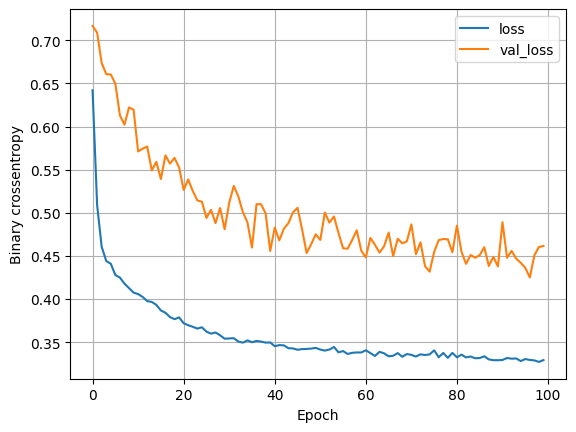

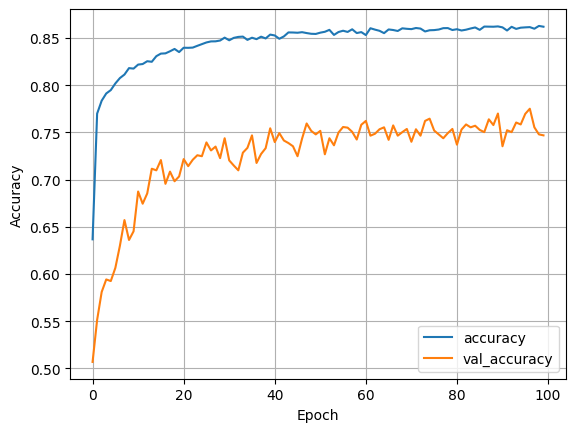

nodes:  32 drop_prob: 0 lr: 0.01 batch_size: 32


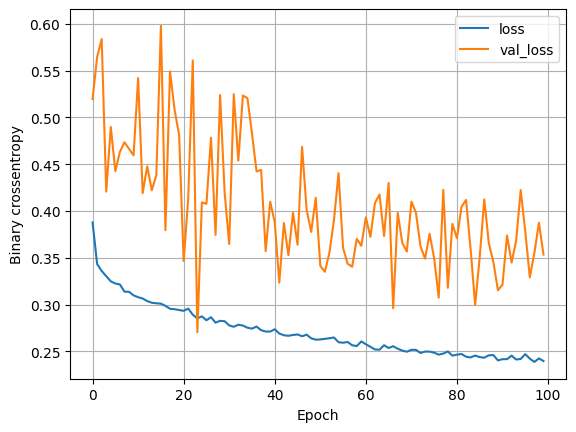

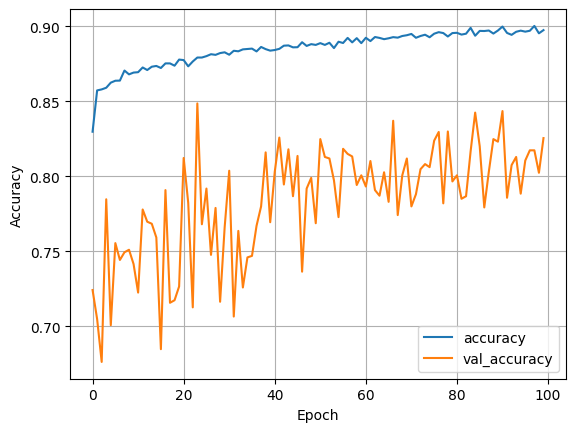

nodes:  32 drop_prob: 0 lr: 0.01 batch_size: 64


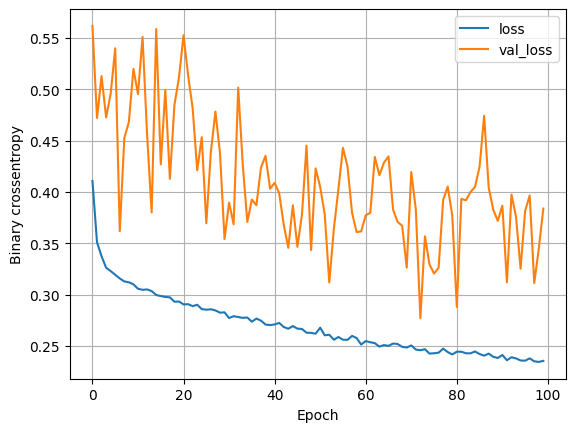

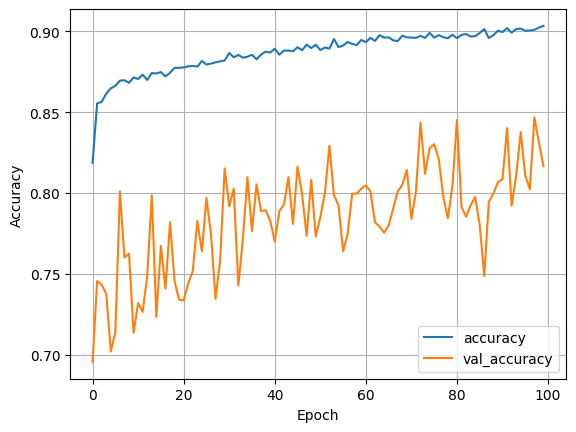

nodes:  32 drop_prob: 0 lr: 0.01 batch_size: 128


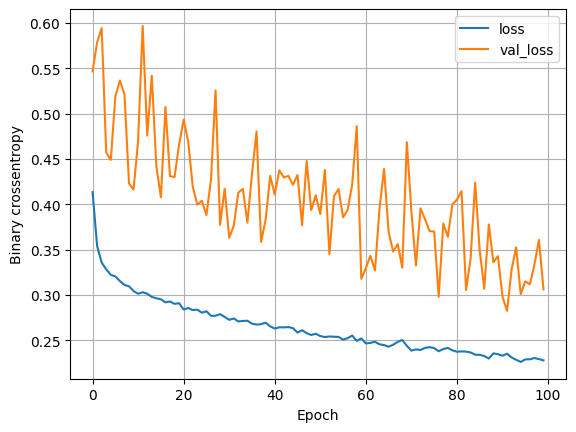

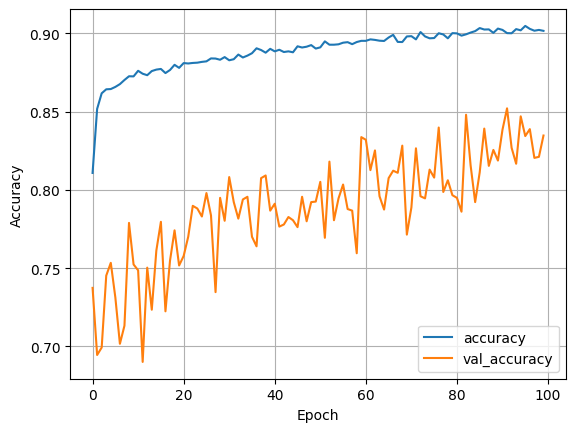

nodes:  32 drop_prob: 0 lr: 0.005 batch_size: 32


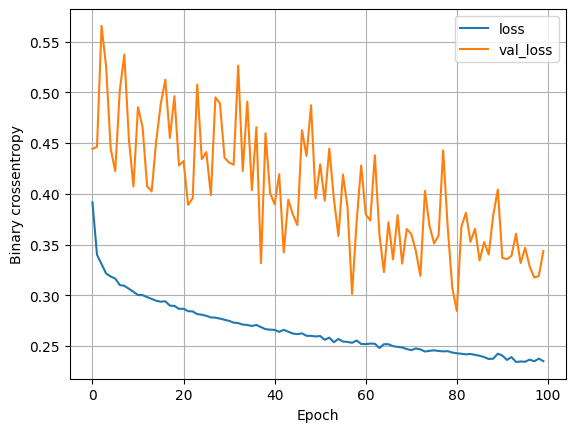

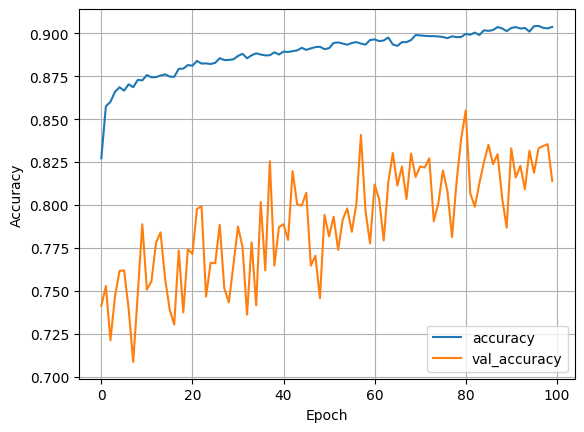

nodes:  32 drop_prob: 0 lr: 0.005 batch_size: 64


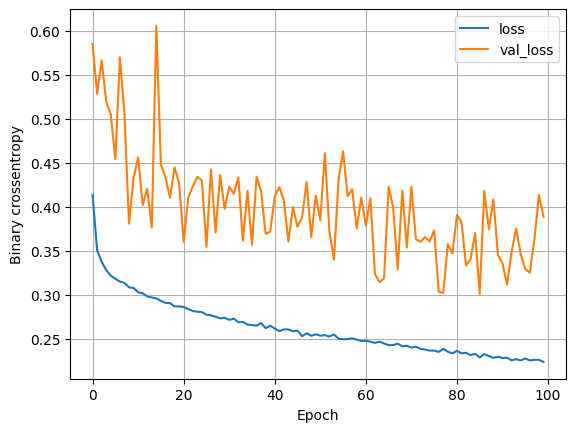

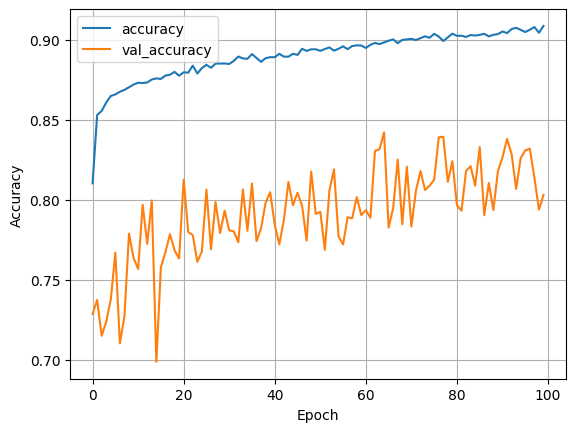

nodes:  32 drop_prob: 0 lr: 0.005 batch_size: 128


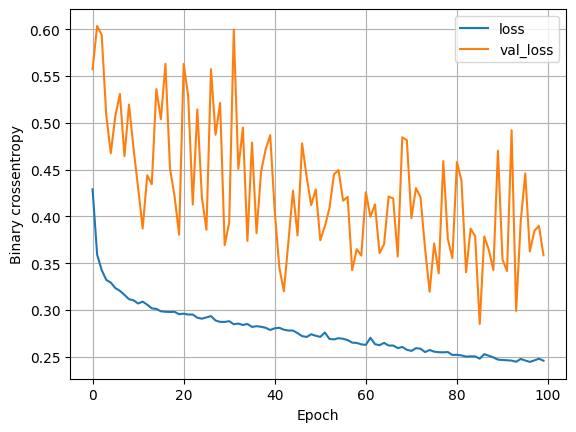

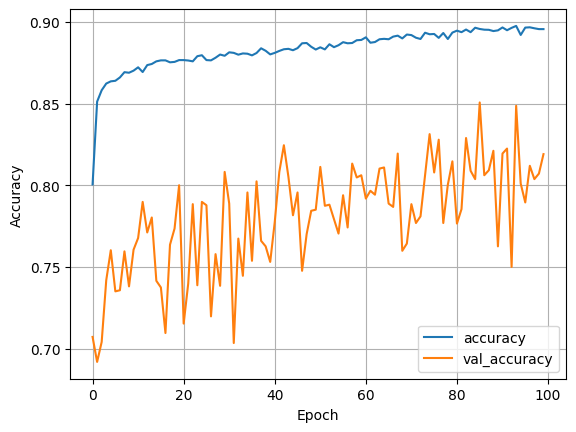

nodes:  32 drop_prob: 0 lr: 0.001 batch_size: 32


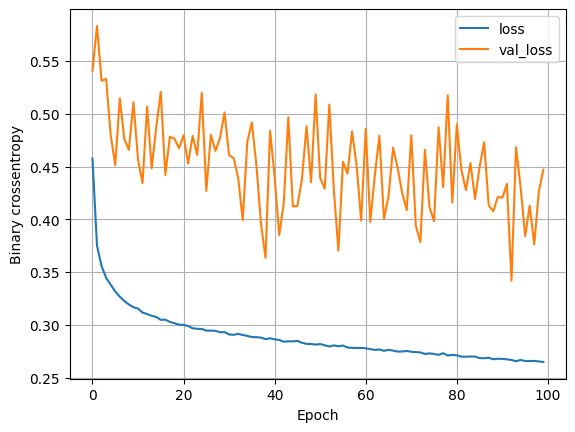

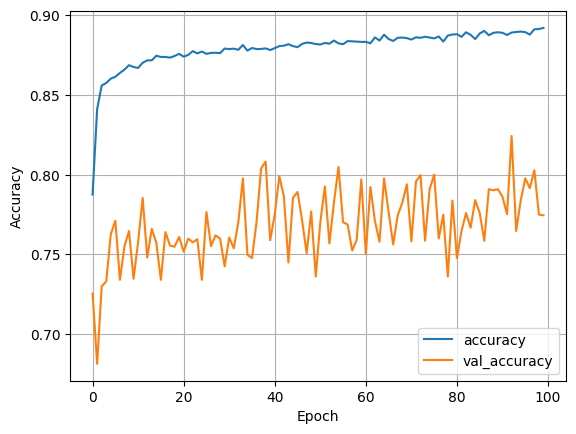

nodes:  32 drop_prob: 0 lr: 0.001 batch_size: 64


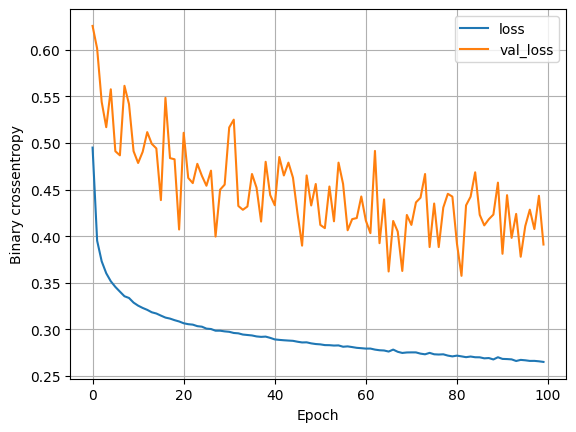

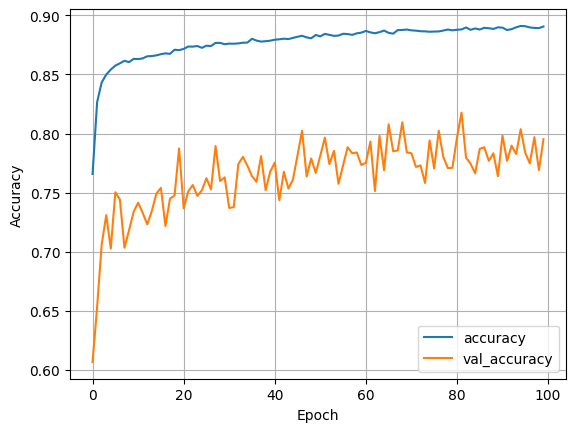

nodes:  32 drop_prob: 0 lr: 0.001 batch_size: 128


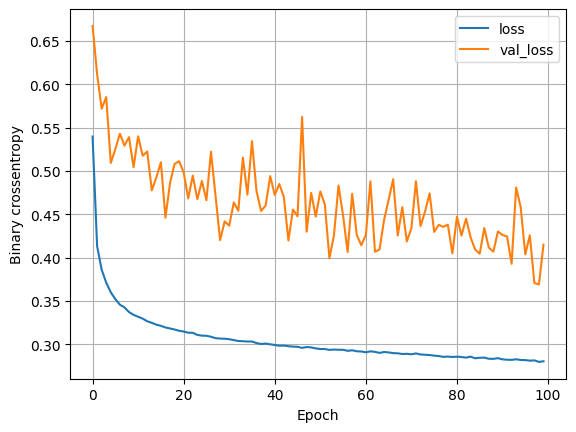

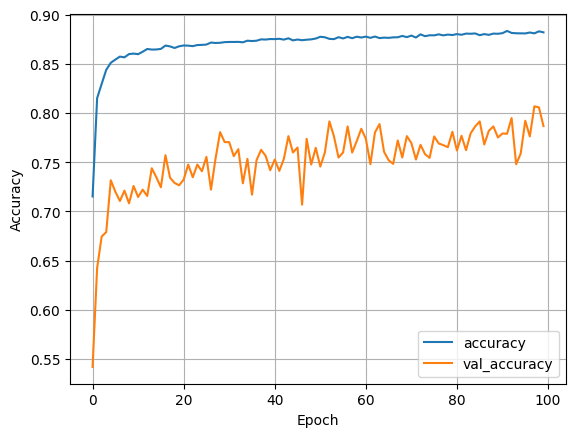

nodes:  32 drop_prob: 0.2 lr: 0.01 batch_size: 32


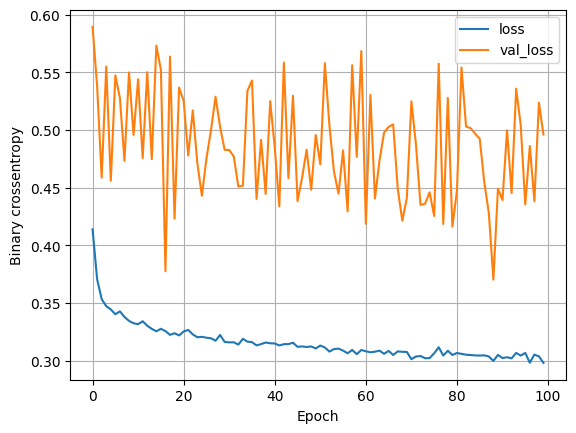

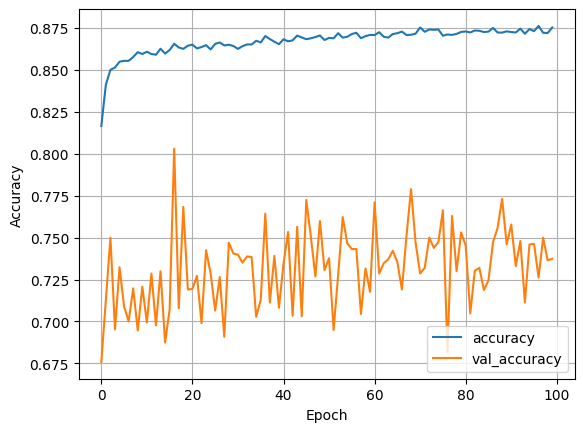

nodes:  32 drop_prob: 0.2 lr: 0.01 batch_size: 64


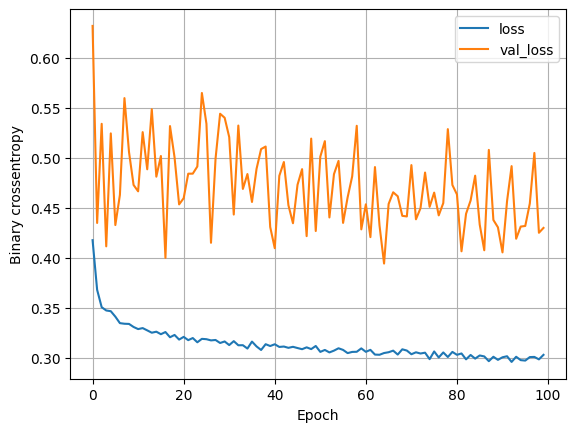

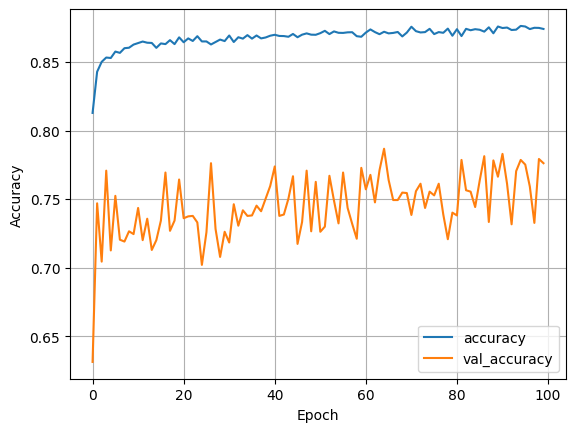

nodes:  32 drop_prob: 0.2 lr: 0.01 batch_size: 128


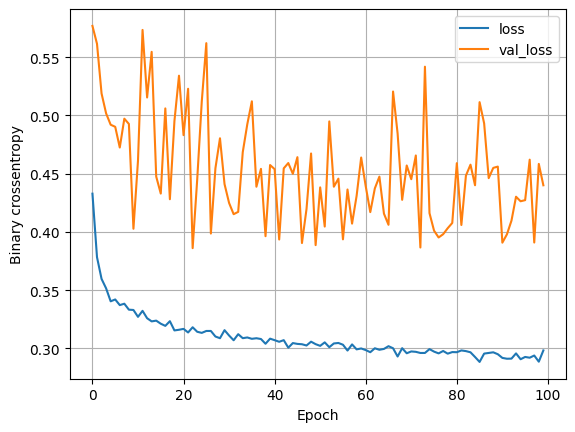

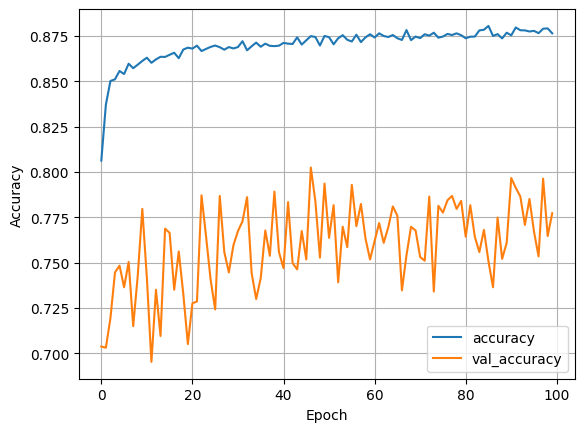

nodes:  32 drop_prob: 0.2 lr: 0.005 batch_size: 32


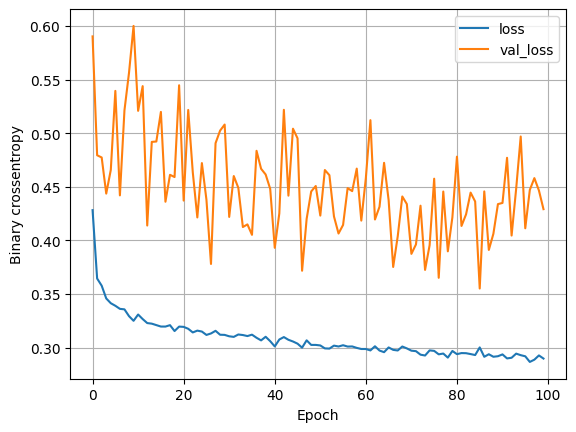

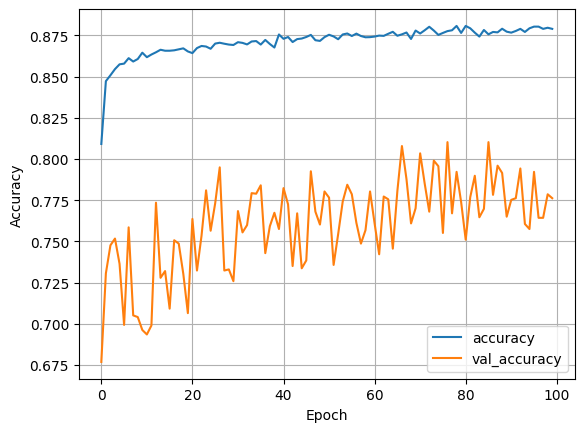

nodes:  32 drop_prob: 0.2 lr: 0.005 batch_size: 64


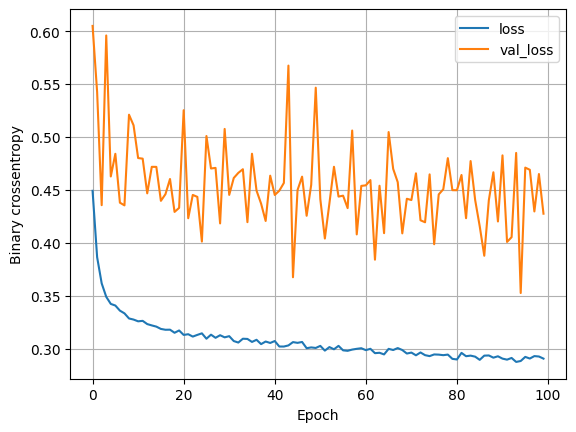

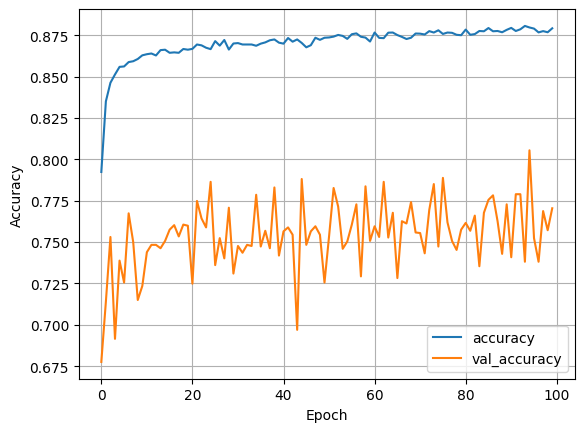

nodes:  32 drop_prob: 0.2 lr: 0.005 batch_size: 128


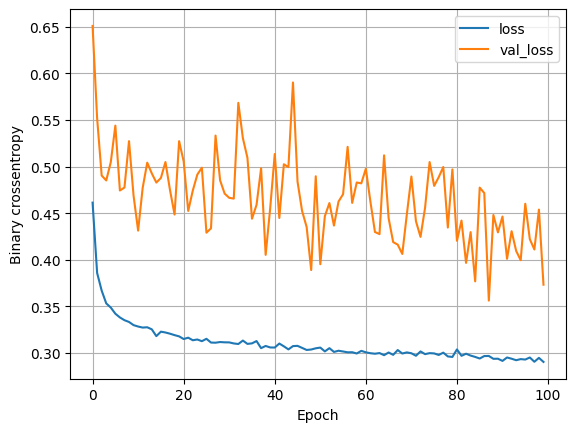

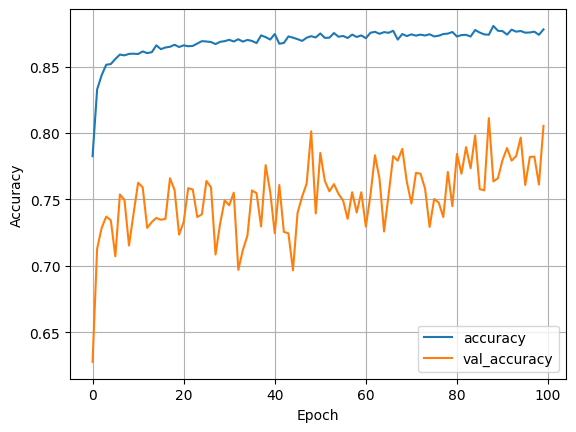

nodes:  32 drop_prob: 0.2 lr: 0.001 batch_size: 32


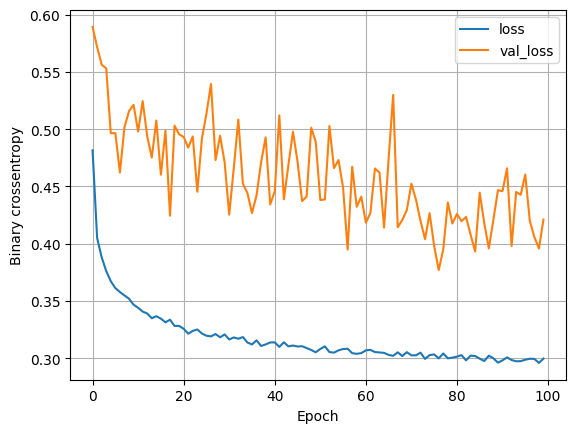

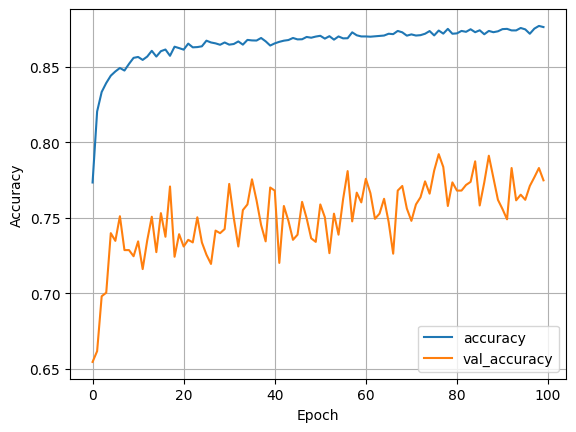

nodes:  32 drop_prob: 0.2 lr: 0.001 batch_size: 64


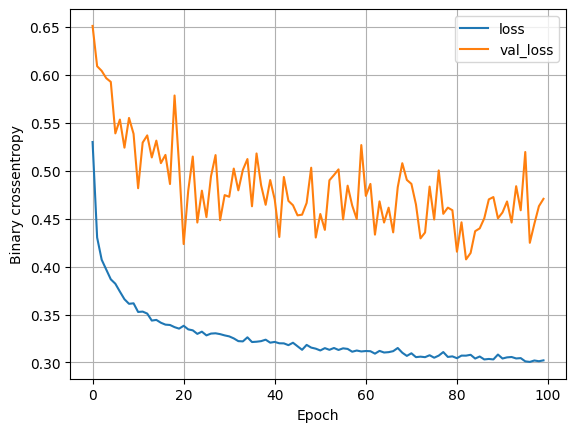

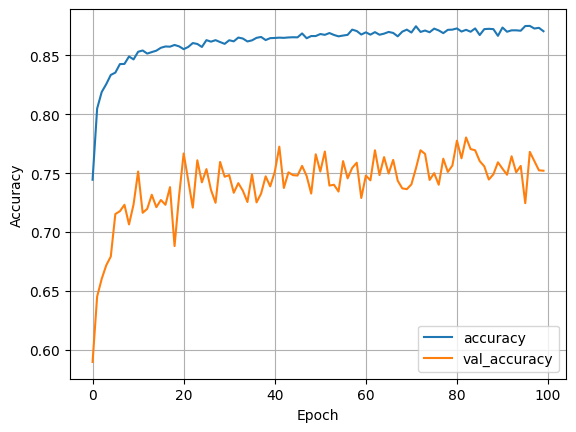

nodes:  32 drop_prob: 0.2 lr: 0.001 batch_size: 128


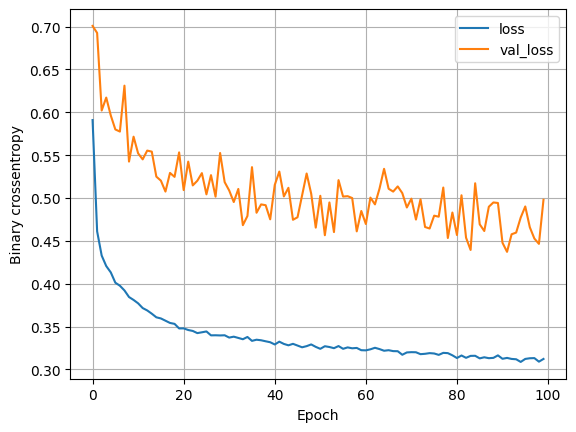

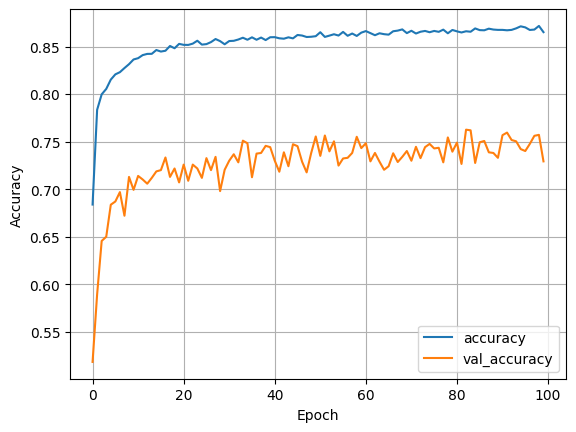

nodes:  64 drop_prob: 0 lr: 0.01 batch_size: 32


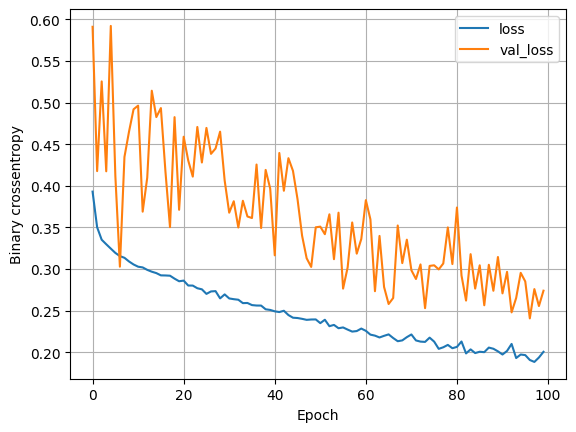

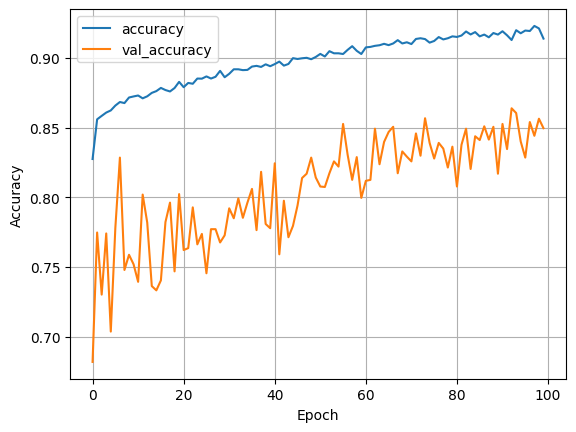

nodes:  64 drop_prob: 0 lr: 0.01 batch_size: 64


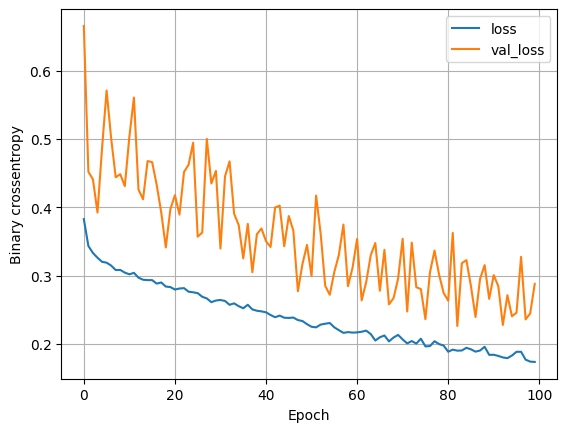

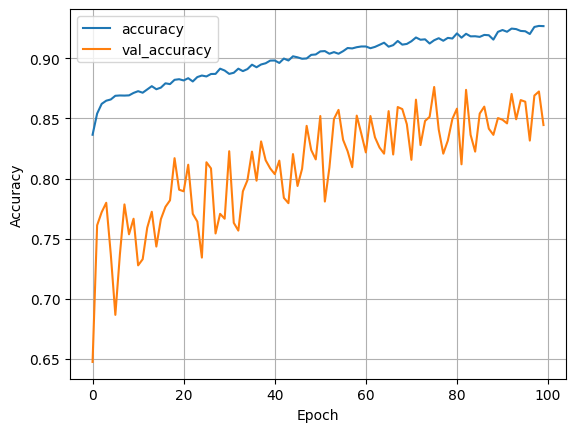

nodes:  64 drop_prob: 0 lr: 0.01 batch_size: 128


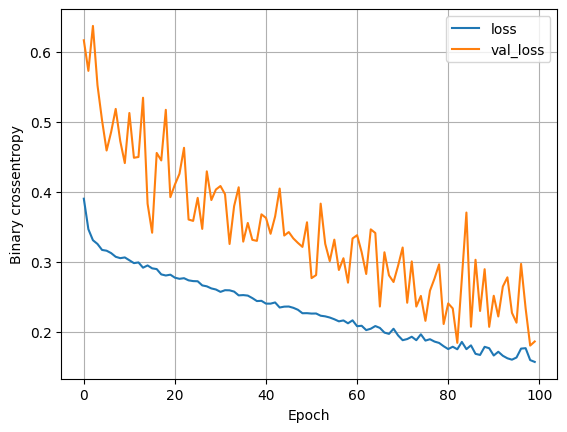

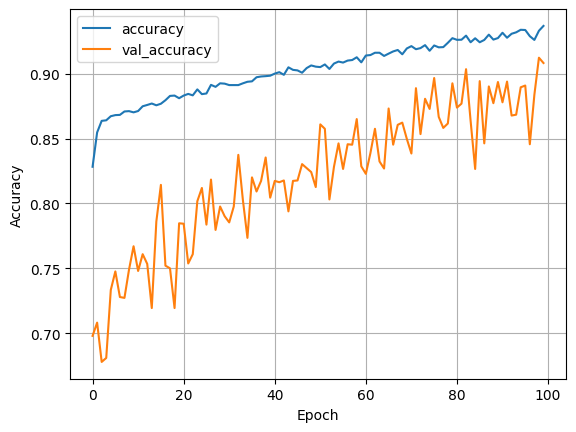

nodes:  64 drop_prob: 0 lr: 0.005 batch_size: 32


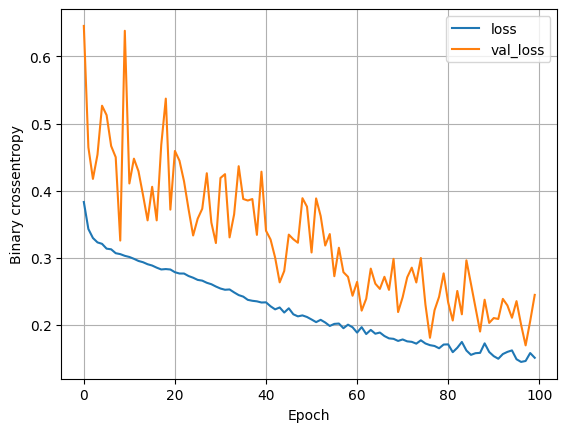

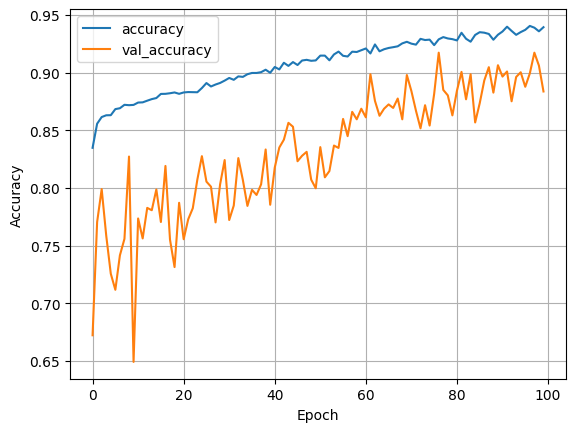

nodes:  64 drop_prob: 0 lr: 0.005 batch_size: 64


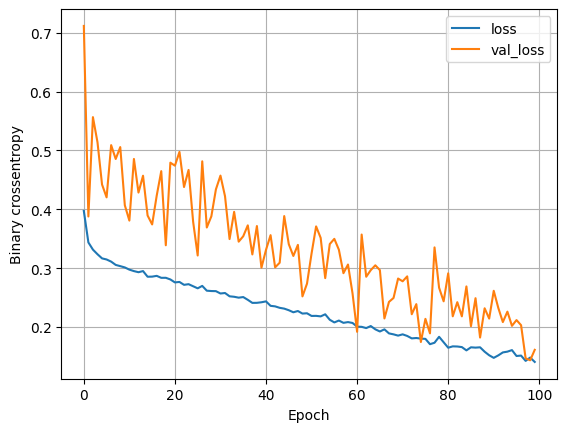

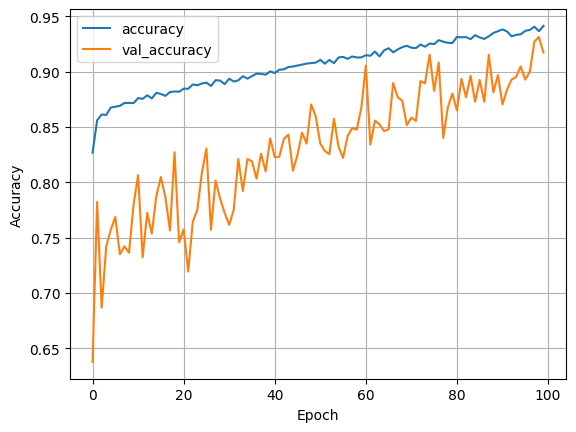

nodes:  64 drop_prob: 0 lr: 0.005 batch_size: 128


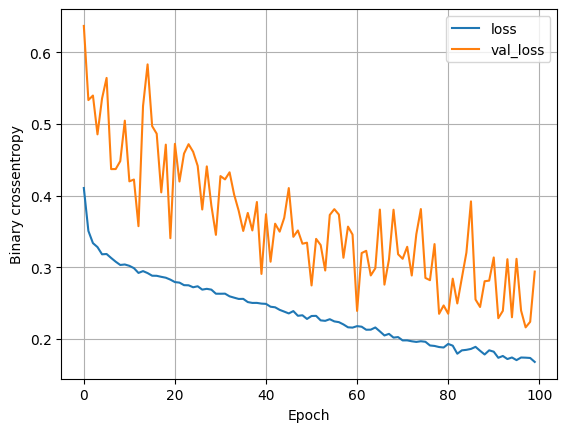

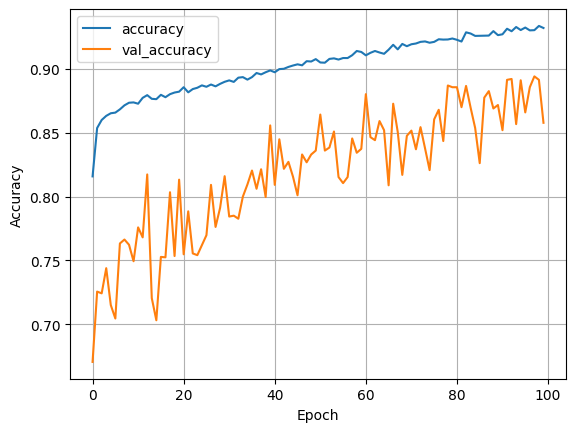

nodes:  64 drop_prob: 0 lr: 0.001 batch_size: 32


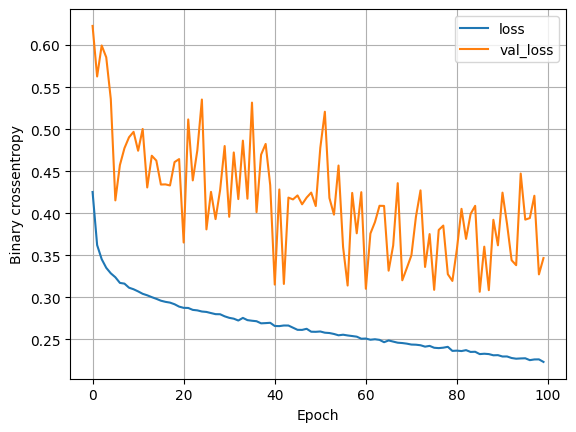

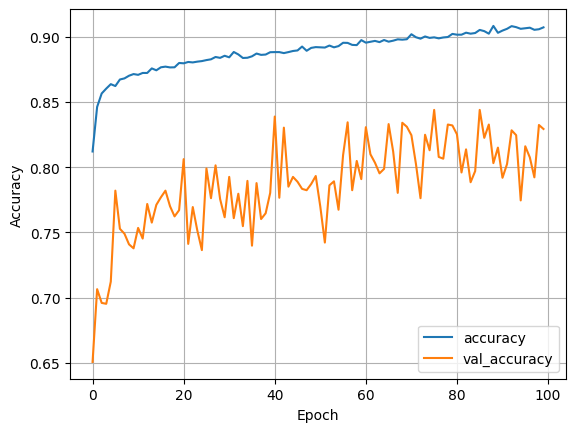

nodes:  64 drop_prob: 0 lr: 0.001 batch_size: 64


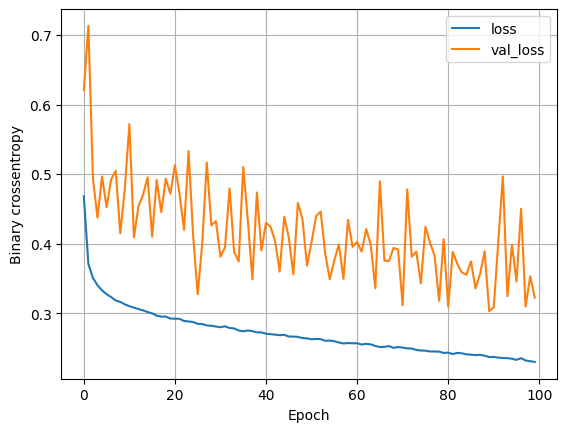

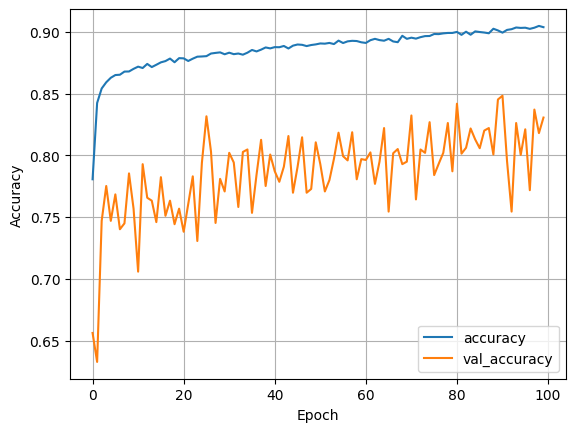

nodes:  64 drop_prob: 0 lr: 0.001 batch_size: 128


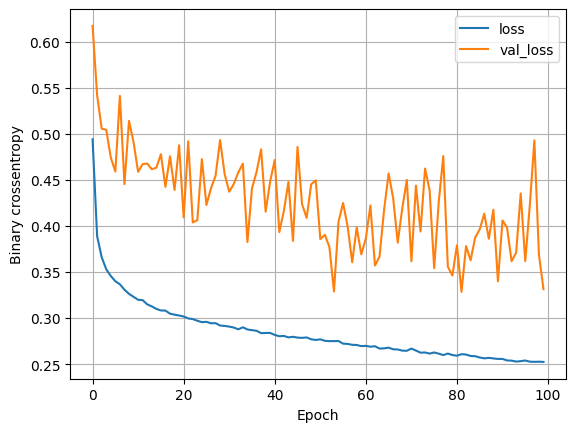

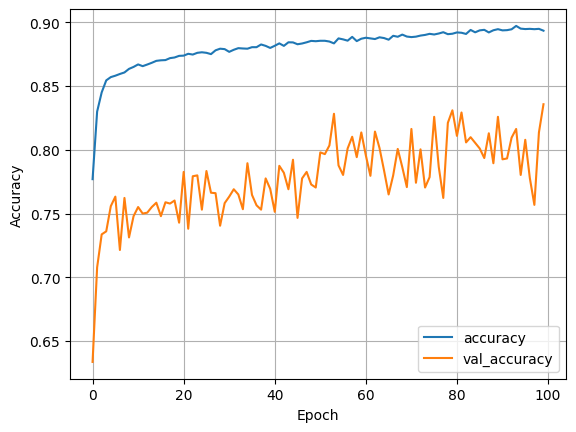

nodes:  64 drop_prob: 0.2 lr: 0.01 batch_size: 32


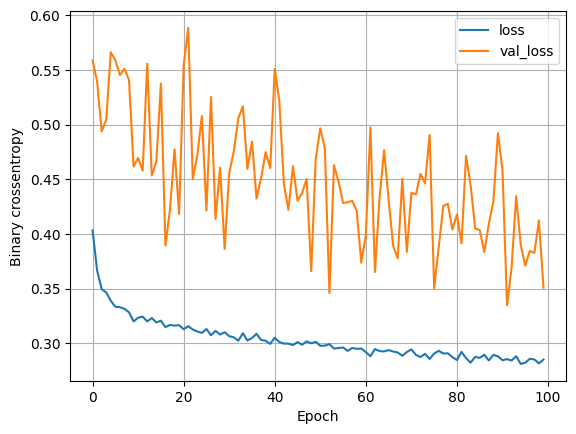

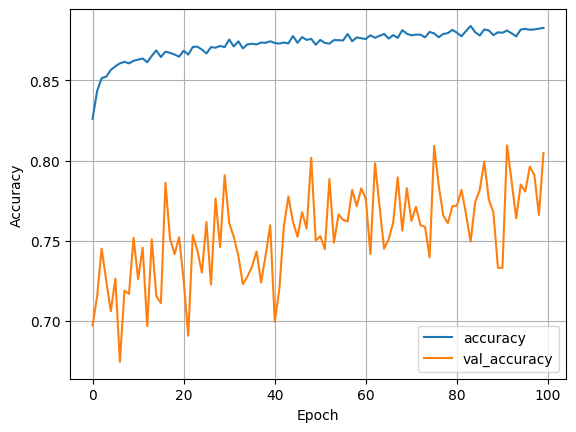

nodes:  64 drop_prob: 0.2 lr: 0.01 batch_size: 64


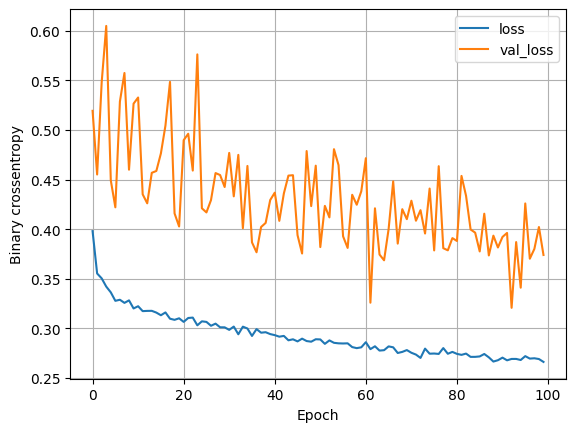

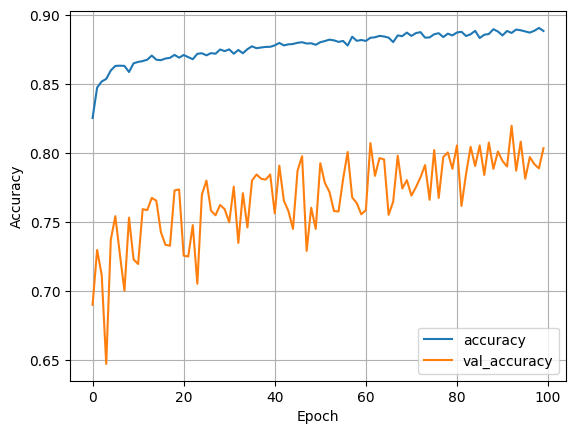

nodes:  64 drop_prob: 0.2 lr: 0.01 batch_size: 128


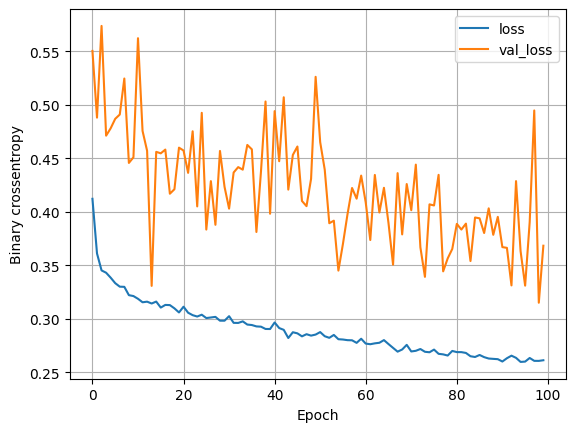

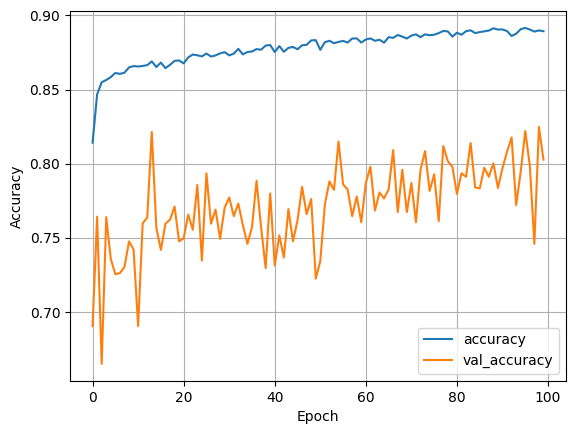

nodes:  64 drop_prob: 0.2 lr: 0.005 batch_size: 32


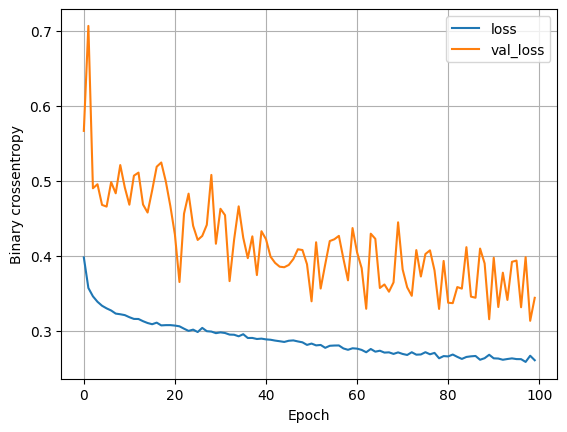

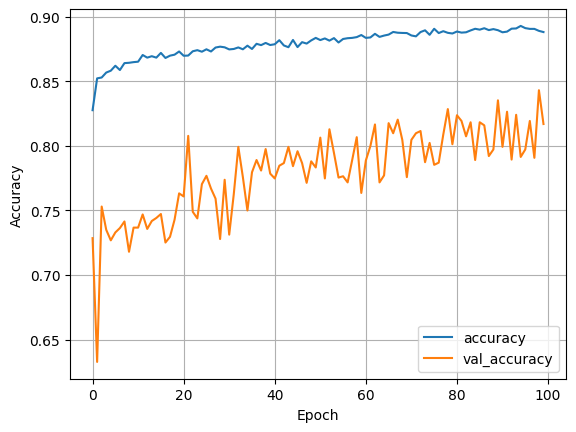

nodes:  64 drop_prob: 0.2 lr: 0.005 batch_size: 64


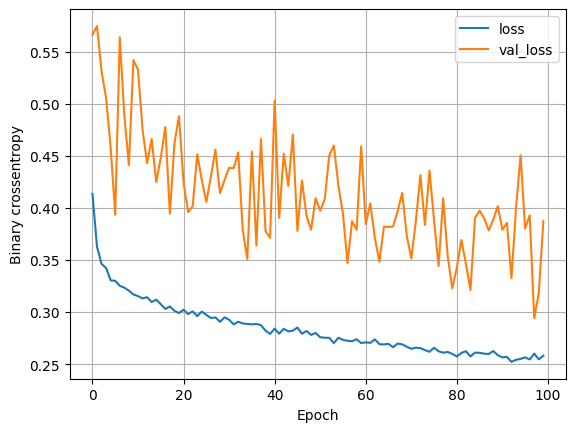

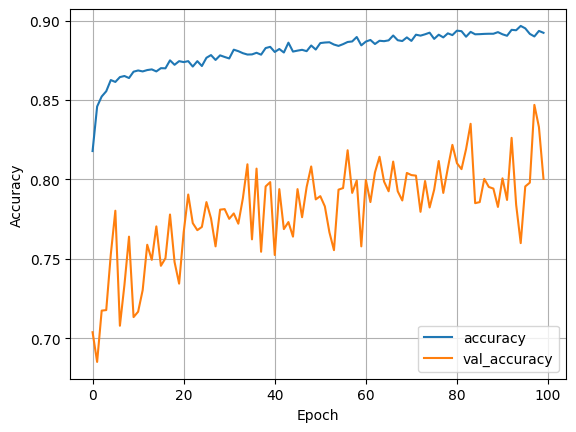

nodes:  64 drop_prob: 0.2 lr: 0.005 batch_size: 128


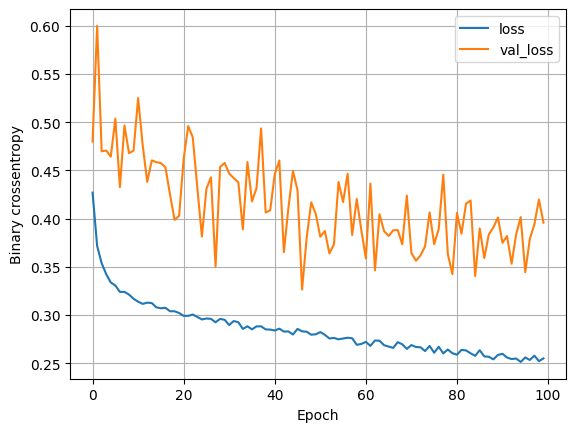

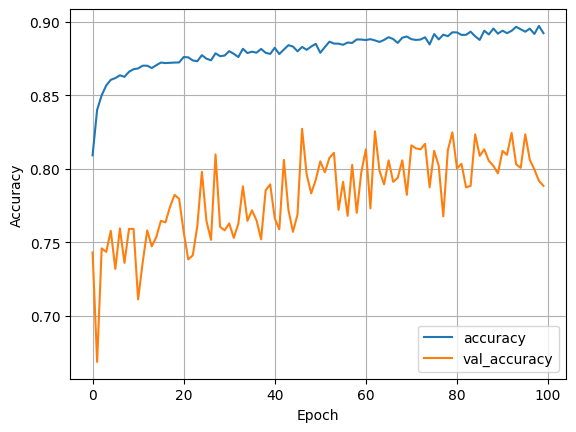

nodes:  64 drop_prob: 0.2 lr: 0.001 batch_size: 32


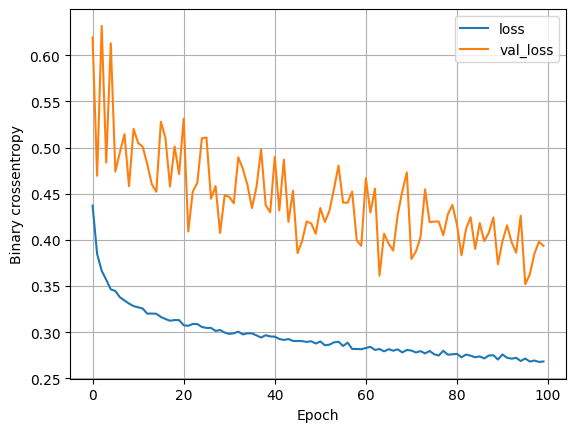

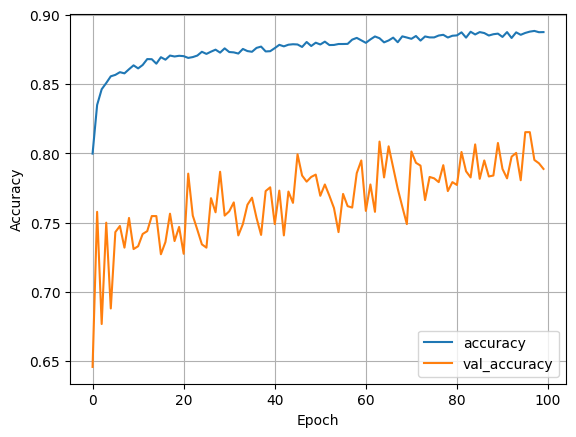

nodes:  64 drop_prob: 0.2 lr: 0.001 batch_size: 64


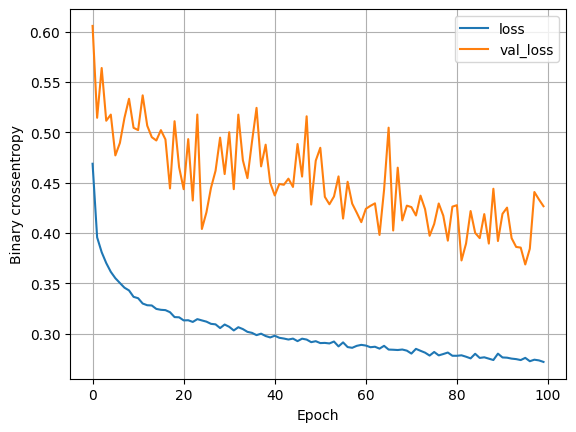

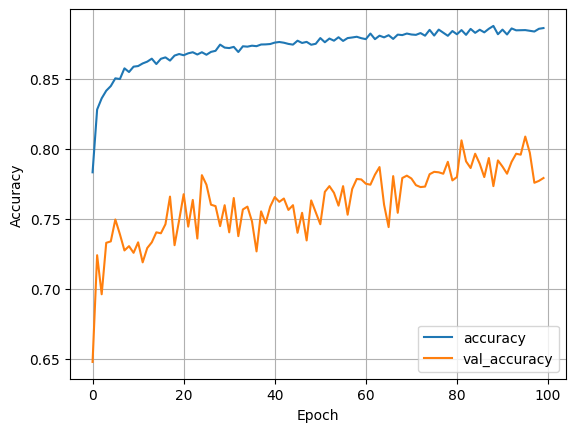

nodes:  64 drop_prob: 0.2 lr: 0.001 batch_size: 128


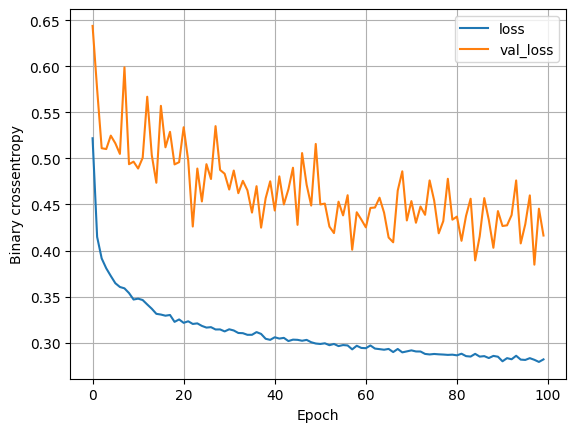

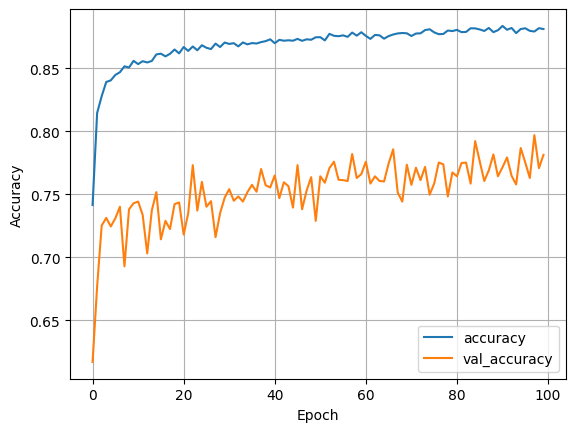

In [71]:
epochs=100
least_val_model= None
least_val_loss= float('inf')
for num_nodes in [16,32,64]:
  for drop_prob in [0,0.2]:
      for lr in [0.01,0.005, 0.001]:
        for batch_size in [32, 64, 128]:
            print('nodes: ',num_nodes,'drop_prob:', drop_prob, 'lr:', lr,'batch_size:', batch_size)
            model, history = train_model(X_train, y_train, num_nodes, drop_prob,lr,batch_size,epochs)
            plot_loss(history)
            plot_accuracy(history)
            # Extract loss and accuracy
            val_loss, val_accuracy = model.evaluate(X_valid, y_valid, verbose=0)

           # Compare the validation loss
            if val_loss < least_val_loss:
              least_val_loss = val_loss
              least_val_model = model

In [73]:
y_pred= least_val_model.predict(X_test)
y_pred= (y_pred>0.5).astype(int).reshape(-1,)

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


In [76]:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.77      0.81      1296
           1       0.89      0.93      0.91      2508

    accuracy                           0.87      3804
   macro avg       0.87      0.85      0.86      3804
weighted avg       0.87      0.87      0.87      3804



# Seoul Bike DataSet

## Linear Regression

* there is a line of best fit--> y = b0 + b1x [simple linear regression]
* there is error called as residual
* **|actual_val - pred_val|**= residual/error
* *sum of all residuals* is tried to decreased with the line of best fit choosen
* y= b0 + b1x1 + b2 x2 + .. + bnxn [multiple value regression]
* assumptions regarding this model
  * Linear
  * Independent: all data values/samples dont rely on one another and hence are independent
  * Nomality: has to do with the residual plot; residuals show follow a normal distribution
  * Homoskedasticity: variance should be same among points;spread of the points is same




### Mean absolute error (MAE)
  * average of all sum of residuals
### Mean squared error (MSE)
  * Average of sum of all residuals square
  * helps with differentiability
### Root Mean Squared error (RMSE)
  * Square root of Average of sum of all residuals square
### R^2 coefficient of determination
  * r^2= 1- RSS/TSS
  * RSS = sum of squared residuals
      * sum of (actual_value - pred_val)
  * TSS = Total sum of squares
      * sum of (y_i - y_mean)
  * when r^2 is near to 1 means good predictor
  
    

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
